<a href="https://colab.research.google.com/github/Manya123-max/CodSoftML/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Load dataset
data = pd.read_csv("/content/spam.csv", encoding="latin-1")

# Rename columns
data.rename(columns={"v1": "label", "v2": "message"}, inplace=True)

# Display the first few rows to confirm changes
print(data.head())

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [28]:
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [29]:
data.columns = ["label", "message"]

In [30]:
# Convert labels to binary (ham = 0, spam = 1)
data["label"] = data["label"].map({"ham": 0, "spam": 1})

In [31]:
# Text preprocessing function
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

data["cleaned_message"] = data["message"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["cleaned_message"])
y = data["label"]

In [33]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [35]:
# Predictions
y_pred = model.predict(X_test)

In [36]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9757847533632287


In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



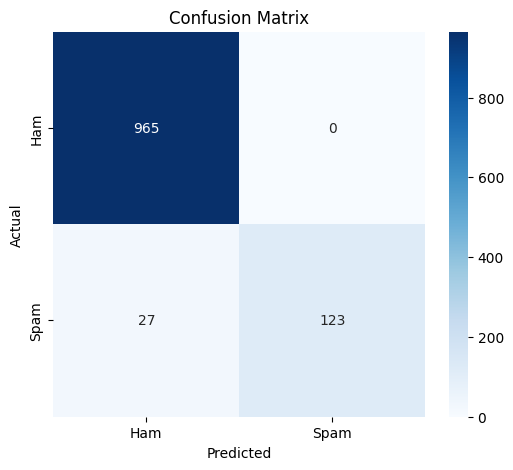

In [38]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
# Display some prediction results
sample_data = X_test[:5]
sample_texts = data["message"].iloc[y_test.index[:5]]
predicted_labels = model.predict(sample_data)

print("\nSample Predictions:")
for i in range(5):
    print(f"Message: {sample_texts.iloc[i]}")
    print(f"Predicted Label: {'Spam' if predicted_labels[i] == 1 else 'Ham'}\n")


Sample Predictions:
Message: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
Predicted Label: Ham

Message: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones
Predicted Label: Ham

Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
Predicted Label: Spam

Message: Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
Predicted Label: Ham

Message: Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
Predicted Label: Spam

